## hammurabiX tutorial e02
(we recommend users to run tutorials in docker image)

### synchrotron emissivity calculation verification

In this verification, we calculate synchrotron emission with the same CRE modelling but two different inputs.

- the first input is analytic, by assuming $$ N(\gamma) = N_0 \gamma^{-\alpha} $$
- the second input is by converting the analytic one into CRE flux on discrete grid, i.e., $$ N(\gamma) = \frac{4\pi m_ec}{\beta} \Phi(E)$$

The first input does not require numeric integral over CRE energy, since the integration can be analytically derived when assuming the spectral index is locally constant.
The second input requires a numeric integral, which in essence follows the same theory as in the first casse.
To verify the methods implemented in hammurabiX, we simulate with the same models but in two ways and check if the results are identical.

The mathematical description can be found in arXiv:1907.00207

In [1]:
import matplotlib
import numpy as np
import healpy as hp
import sys
sys.path.append('../hampyx/')
import hampyx as hpx

matplotlib.use('Agg')
%matplotlib inline

- set CRE grid resolution

In [2]:
NX = 20
NY = 20
NZ = 20
NE = 80

- write out the analytic CRE flux distribution

In [3]:
def prepare_cre():
    obj = hpx.Hampyx(xml_path='../templates/params_template.xml')
    obj.del_par(['observable', 'sync'], 'all')
    obj.del_par(['observable', 'dm'], 'all')
    obj.del_par(['observable', 'faraday'], 'all')
    obj.del_par(['observable', 'dust'], 'all')

    obj.mod_par(['cre'], {'cue': str(1), 'type': 'unif'})
    obj.mod_par(['cre','unif','alpha'], {'value': str(3)})
    obj.mod_par(['cre','unif','r0'], {'value': str(5)})
    
    obj.mod_par(['fieldio','cre'],{'write':'1','read':'0'})
    obj.mod_par(['grid','box_cre','nx'],{'value':str(NX)})
    obj.mod_par(['grid','box_cre','ny'],{'value':str(NY)})
    obj.mod_par(['grid','box_cre','nz'],{'value':str(NZ)})
    obj.mod_par(['grid','box_cre','nE'],{'value':str(NE)})
    obj.mod_par(['grid', 'box_cre', 'x_min'], {'value': '-13'})
    obj.mod_par(['grid', 'box_cre', 'x_max'], {'value': '-4'})
    obj.mod_par(['grid', 'box_cre', 'y_min'], {'value': '-2'})
    obj.mod_par(['grid', 'box_cre', 'y_max'], {'value': '2'})
    obj.mod_par(['grid', 'box_cre', 'z_min'], {'value': '-4'})
    obj.mod_par(['grid', 'box_cre', 'z_max'], {'value': '4'})
    obj.mod_par(['grid', 'box_cre', 'E_min'], {'value': '0.1'})
    obj.mod_par(['grid', 'box_cre', 'E_max'], {'value': '100'})

    obj(True)
    
prepare_cre()

- read in the CRE grid and simulate synchrotron emission

In [4]:
def simulator_globalrnd_crenum(_nside,_b0,_psi0,_psi1,_chi0,_br,_ani,_freq):
    obj = hpx.Hampyx(xml_path='../templates/params_template.xml')
    obj.del_par(['observable', 'sync'], 'all')
    obj.add_par(['observable'], 'sync', {'cue': str(1), 'freq': str(_freq), 'nside': str(_nside)})
    obj.del_par(['observable', 'dm'], 'all')
    obj.del_par(['observable', 'faraday'], 'all')
    obj.del_par(['observable', 'dust'], 'all')
    
    obj.mod_par(['grid','shell','layer'], {'type': 'auto'})
    obj.mod_par(['grid','shell', 'layer', 'auto', 'shell_num'], {'value': str(1)})
    obj.mod_par(['grid','shell', 'layer', 'auto', 'nside_sim'], {'value': str(_nside)})
    obj.mod_par(['grid','shell','oc_r_res'], {'value': str(0.005)})
    obj.mod_par(['grid','shell','oc_r_max'], {'value': str(2.0)})
    obj.mod_par(['grid','shell','oc_r_min'], {'value': str(0.5)})
    
    obj.mod_par(['magneticfield', 'regular'], {'cue': str(1), 'type': 'unif'})
    obj.mod_par(['magneticfield', 'regular', 'unif', 'bp'], {'value': str(_b0)})
    obj.mod_par(['magneticfield', 'regular', 'unif', 'l0'], {'value': str(70)})
    obj.mod_par(['magneticfield', 'regular', 'unif', 'bv'], {'value': str(0)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'b0'], {'value': str(_b0)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'psi0'], {'value': str(_psi0)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'psi1'], {'value': str(_psi1)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'chi0'], {'value': str(_chi0)})
    
    obj.mod_par(['magneticfield', 'random'],{'cue': str(0)})

    obj.mod_par(['grid','shell','gc_z_min'], {'value': '-4'})
    obj.mod_par(['grid','shell','gc_z_max'], {'value': '4'})
    obj.mod_par(['grid','shell','oc_lat_min'], {'value': '-90'})

    obj.mod_par(['thermalelectron', 'regular'], {'cue': str(1), 'type': 'unif'})
    obj.mod_par(['thermalelectron', 'random'], {'cue': str(0)})
    obj.mod_par(['thermalelectron', 'regular', 'unif', 'n0'], {'value': str(0.01)})
    obj.mod_par(['thermalelectron', 'regular', 'unif', 'r0'], {'value': str(4)})

    obj.mod_par(['fieldio','cre'],{'read':'1', 'write':'0'})
    obj.mod_par(['grid','box_cre','nx'],{'value':str(NX)})
    obj.mod_par(['grid','box_cre','ny'],{'value':str(NY)})
    obj.mod_par(['grid','box_cre','nz'],{'value':str(NZ)})
    obj.mod_par(['grid','box_cre','nE'],{'value':str(NE)})
    obj.mod_par(['grid', 'box_cre', 'x_min'], {'value': '-11'})
    obj.mod_par(['grid', 'box_cre', 'x_max'], {'value': '-5'})
    obj.mod_par(['grid', 'box_cre', 'y_min'], {'value': '-2'})
    obj.mod_par(['grid', 'box_cre', 'y_max'], {'value': '2'})
    obj.mod_par(['grid', 'box_cre', 'z_min'], {'value': '-4'})
    obj.mod_par(['grid', 'box_cre', 'z_max'], {'value': '4'})
    obj.mod_par(['grid', 'box_cre', 'E_min'], {'value': '0.1'})
    obj.mod_par(['grid', 'box_cre', 'E_max'], {'value': '100'})

    obj(True)

    q = obj.sim_map[('sync', str(_freq), str(_nside), 'Q')]*1000
    u = obj.sim_map[('sync', str(_freq), str(_nside), 'U')]*1000
    i = obj.sim_map[('sync', str(_freq), str(_nside), 'I')]*1000
    return (i,q,u)

B0 = 2.
PSI0 = 27.
PSI1 = 0.9
CHI0 = 25.
NSIDE = 16
FREQ = 30.

rslt_num = simulator_globalrnd_crenum(NSIDE, B0, PSI0, PSI1, CHI0, 0.02, 1.0, FREQ)

- calculate synchrotron emission with the same settings but with analytic CRE distribution

In [5]:
def simulator_globalrnd_creana(_nside,_b0,_psi0,_psi1,_chi0,_br,_ani,_freq):
    obj = hpx.Hampyx(xml_path='../templates/params_template.xml')
    obj.del_par(['observable', 'sync'], 'all')
    obj.add_par(['observable'], 'sync', {'cue': str(1), 'freq': str(_freq), 'nside': str(_nside)})
    obj.del_par(['observable', 'dm'], 'all')
    obj.del_par(['observable', 'faraday'], 'all')
    obj.del_par(['observable', 'dust'], 'all')
    
    obj.mod_par(['grid','shell','layer'], {'type': 'auto'})
    obj.mod_par(['grid','shell', 'layer', 'auto', 'shell_num'], {'value': str(1)})
    obj.mod_par(['grid','shell', 'layer', 'auto', 'nside_sim'], {'value': str(_nside)})
    obj.mod_par(['grid','shell','oc_r_res'], {'value': str(0.005)})
    obj.mod_par(['grid','shell','oc_r_max'], {'value': str(2.0)})
    obj.mod_par(['grid','shell','oc_r_min'], {'value': str(0.5)})
    
    obj.mod_par(['magneticfield', 'regular'], {'cue': str(1), 'type': 'unif'})
    obj.mod_par(['magneticfield', 'regular', 'unif', 'bp'], {'value': str(_b0)})
    obj.mod_par(['magneticfield', 'regular', 'unif', 'l0'], {'value': str(70)})
    obj.mod_par(['magneticfield', 'regular', 'unif', 'bv'], {'value': str(0)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'b0'], {'value': str(_b0)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'psi0'], {'value': str(_psi0)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'psi1'], {'value': str(_psi1)})
    obj.mod_par(['magneticfield', 'regular', 'wmap', 'chi0'], {'value': str(_chi0)})
    
    obj.mod_par(['magneticfield', 'random'],{'cue': str(0)})

    obj.mod_par(['grid','shell','gc_z_min'], {'value': '-4'})
    obj.mod_par(['grid','shell','gc_z_max'], {'value': '4'})
    obj.mod_par(['grid','shell','oc_lat_min'], {'value': '-90'})

    obj.mod_par(['thermalelectron', 'regular'], {'cue': str(1), 'type': 'unif'})
    obj.mod_par(['thermalelectron', 'random'], {'cue': str(0)})
    obj.mod_par(['thermalelectron', 'regular', 'unif', 'n0'], {'value': str(0.01)})
    obj.mod_par(['thermalelectron', 'regular', 'unif', 'r0'], {'value': str(4)})

    obj.mod_par(['cre'], {'cue': str(1), 'type': 'unif'})
    obj.mod_par(['cre','unif','alpha'], {'value': str(3)})
    obj.mod_par(['cre','unif','r0'], {'value': str(5)})

    obj(True)

    q = obj.sim_map[('sync', str(_freq), str(_nside), 'Q')]*1000
    u = obj.sim_map[('sync', str(_freq), str(_nside), 'U')]*1000
    i = obj.sim_map[('sync', str(_freq), str(_nside), 'I')]*1000
    return (i,q,u)

rslt_ana = simulator_globalrnd_creana(NSIDE, B0, PSI0, PSI1, CHI0, 0.02, 1.0, FREQ)

- compare results from two cases

/usr/local/lib/python3.6/dist-packages/healpy/projaxes.py:988: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/usr/local/lib/python3.6/dist-packages/healpy/projaxes.py:958: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


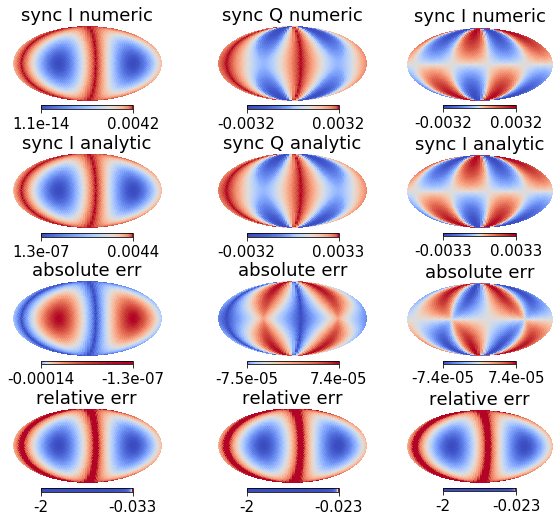

In [6]:
matplotlib.rcParams.update({'font.size': 15})
colormap=matplotlib.cm.coolwarm;
colormap.set_under("white");
colormap.set_bad("white")

fig = matplotlib.pyplot.figure(figsize=(10,10))

gs = matplotlib.gridspec.GridSpec(30, 30)

fig.add_subplot(gs[0:5, 0:10])
hp.mollview(rslt_num[0],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='sync I numeric',cbar=1)
fig.add_subplot(gs[7:12, 0:10])
hp.mollview(rslt_ana[0],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='sync I analytic',cbar=1)
fig.add_subplot(gs[14:19, 0:10])
hp.mollview(rslt_num[0]-rslt_ana[0],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='absolute err',cbar=1)
fig.add_subplot(gs[21:26, 0:10])
hp.mollview(2.*(rslt_num[0]-rslt_ana[0])/(rslt_num[0]+rslt_ana[0]),format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='relative err',cbar=1)


fig.add_subplot(gs[0:5, 11:21])
hp.mollview(rslt_num[1],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='sync Q numeric',cbar=1)
fig.add_subplot(gs[7:12, 11:21])
hp.mollview(rslt_ana[1],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='sync Q analytic',cbar=1)
fig.add_subplot(gs[14:19, 11:21])
hp.mollview(rslt_num[1]-rslt_ana[1],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='absolute err',cbar=1)
fig.add_subplot(gs[21:26, 11:21])
hp.mollview(2.*(rslt_num[1]-rslt_ana[1])/(rslt_num[1]+rslt_ana[1]),format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='relative err',cbar=1)


fig.add_subplot(gs[0:5, 22:32])
hp.mollview(rslt_num[2],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='sync I numeric',cbar=1)
fig.add_subplot(gs[7:12, 22:32])
hp.mollview(rslt_ana[2],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='sync I analytic',cbar=1)
fig.add_subplot(gs[14:19, 22:32])
hp.mollview(rslt_num[2]-rslt_ana[2],format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='absolute err',cbar=1)
fig.add_subplot(gs[21:26, 22:32])
hp.mollview(2.*(rslt_num[2]-rslt_ana[2])/(rslt_num[2]+rslt_ana[2]),format='%.2g',
            norm='hist',cmap='coolwarm',hold=True,title='relative err',cbar=1)

end